<div style="color: #8B4513; font-weight: bold; font-size: 16px;">

## Transitioning to Dataset Analysis  </div>

This notebook focuses on analyzing the key factors that influence rental prices (realSum). By exploring correlations, feature importance, and pricing variations, the goal is to uncover the determinants that drive Airbnb pricing strategies.
<div style="color: #8B4513; font-weight: bold; font-size: 16px;">

### Objectives: </div>

1. **Uncover Patterns and Trends**: Analyze rental pricing trends across cities to identify geographical and property-related variations.
2. **Key Factor Identification**: Perform correlation analysis and feature importance assessment to pinpoint the most significant variables affecting rental prices.
3. **Support Decision-Making**: Provide insights for travelers seeking affordable accommodations and for hosts aiming to optimize pricing and attract more bookings.

By conducting this analysis, we aim to better understand the dynamics of the Airbnb rental market and derive actionable insights to support informed decision-making for both hosts and travelers.


In [2]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, shapiro, pearsonr, chi2_contingency
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [3]:
# Load dataframe to variable
df = pd.read_pickle('/Users/alinagajdun/Documents/python for DA/data/Arbnb_price_data/cleaned_arbnb_data.pkl')

# Print info about dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   City                        51707 non-null  category
 1   day_of_week                 51707 non-null  category
 2   realSum                     51707 non-null  float64 
 3   room_type                   51707 non-null  category
 4   room_shared                 51707 non-null  int64   
 5   room_private                51707 non-null  int64   
 6   person_capacity             51707 non-null  int64   
 7   host_is_superhost           51707 non-null  int64   
 8   multi                       51707 non-null  int64   
 9   biz                         51707 non-null  int64   
 10  cleanliness_rating          51707 non-null  int64   
 11  guest_satisfaction_overall  51707 non-null  int64   
 12  bedrooms                    51707 non-null  int64   
 13  dist            

<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
1. Conducting Feature Importance technique with a Forest of Trees to Identify Key Factors Influencing the Price (realSum)
</div>

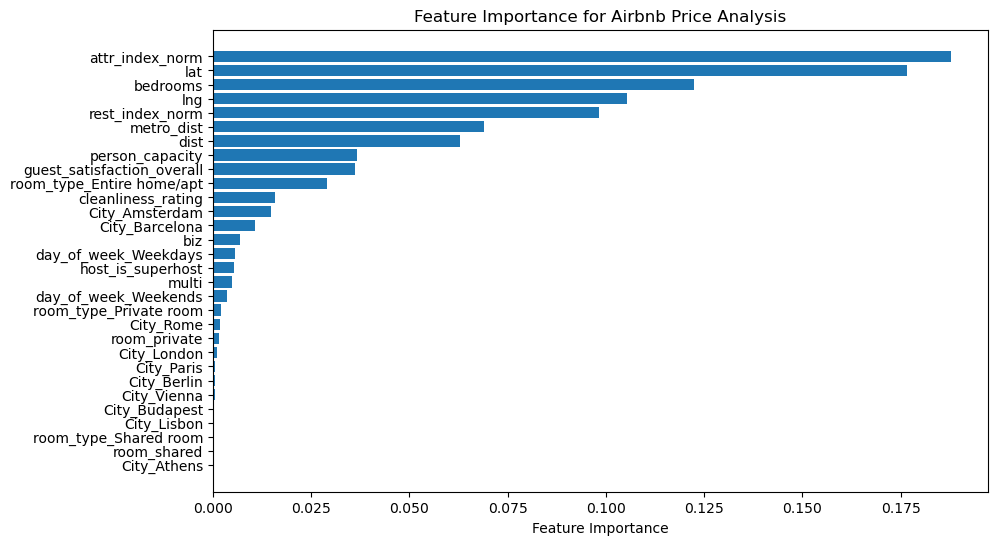

In [5]:
# Define features (X) and target variable (y)
X = df[['City', 'day_of_week', 'room_type', 'room_shared', 'room_private', 'person_capacity',
        'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
        'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng', 'lat',
        'rest_index_norm', 'attr_index_norm']]
y = df['realSum']

# Encode categorical features
X = pd.get_dummies(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=15)
model.fit(X_train, y_train)

# Calculate feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Airbnb Price Analysis')
plt.show();

<div style="color: #8B4513; font-weight: bold; font-size: 15px;">
The results of the Feature Importance analysis indicate that the most significant factors influencing rental prices are geographical attributes: distance to the city center (dist), coordinates (lat, lng), and proximity to metro stations (metro_dist). This is logical, as proximity to key locations greatly increases the attractiveness of the property for renters.

Another important factor is the number of bedrooms (bedrooms), which reflects the capacity of the accommodation and its convenience for group trips. Cleanliness ratings (cleanliness_rating) and guest satisfaction (guest_satisfaction_overall) also play a significant role in determining rental prices, emphasizing the importance of high-quality service to boost rental value.

Additionally, the normalized attraction index (attr_index_norm) and the normalized restaurant index (rest_index_norm) have notable influence on pricing, highlighting the importance of proximity to cultural landmarks and dining options for attracting tourists and increasing rental value.

In contrast, the day of the week (day_of_week) showed minimal influence on pricing, suggesting that there are no significant price fluctuations between weekdays and weekends. Similarly, the impact of cities included in the analysis was less significant compared to local geographical factors.

Next Steps: Further investigate other aspects of pricing to confirm or refute additional hypotheses, particularly in relation to tourist preferences and seasonal trends.</span>

<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
2. What are the relationships between the most influential variables identified through Feature Importance analysis, and how do these variables correlate with each other?</div>

Correlation Matrix:



,dist,lng,lat,metro_dist,bedrooms,person_capacity,guest_satisfaction_overall,cleanliness_rating,rest_index_norm,attr_index_norm
dist,1.000000,-0.147424,0.405878,0.558064,-0.006262,-0.128488,-0.004178,-0.030202,-0.467791,-0.242862
lng,-0.147424,1.000000,-0.159214,-0.069506,0.013688,0.146848,0.156079,0.120379,-0.134731,-0.221591
lat,0.405878,-0.159214,1.000000,0.086424,-0.104694,-0.168265,-0.033957,-0.092502,0.023698,0.435237
metro_dist,0.558064,-0.069506,0.086424,1.000000,0.044431,-0.037267,0.029788,0.010441,-0.259654,-0.219587
bedrooms,-0.006262,0.013688,-0.104694,0.044431,1.000000,0.560627,0.047573,0.033489,-0.057726,-0.063773
person_capacity,-0.128488,0.146848,-0.168265,-0.037267,0.560627,1.000000,0.005181,0.003256,0.038059,-0.050487
guest_satisfaction_overall,-0.004178,0.156079,-0.033957,0.029788,0.047573,0.005181,1.000000,0.714045,-0.008765,-0.074146
cleanliness_rating,-0.030202,0.120379,-0.092502,0.010441,0.033489,0.003256,0.714045,1.000000,-0.005995,-0.075372
rest_index_norm,-0.467791,-0.134731,0.023698,-0.259654,-0.057726,0.038059,-0.008765,-0.005995,1.000000,0.472143
attr_index_norm,-0.242862,-0.221591,0.435237,-0.219587,-0.063773,-0.050487,-0.074146,-0.075372,0.472143,1.000000


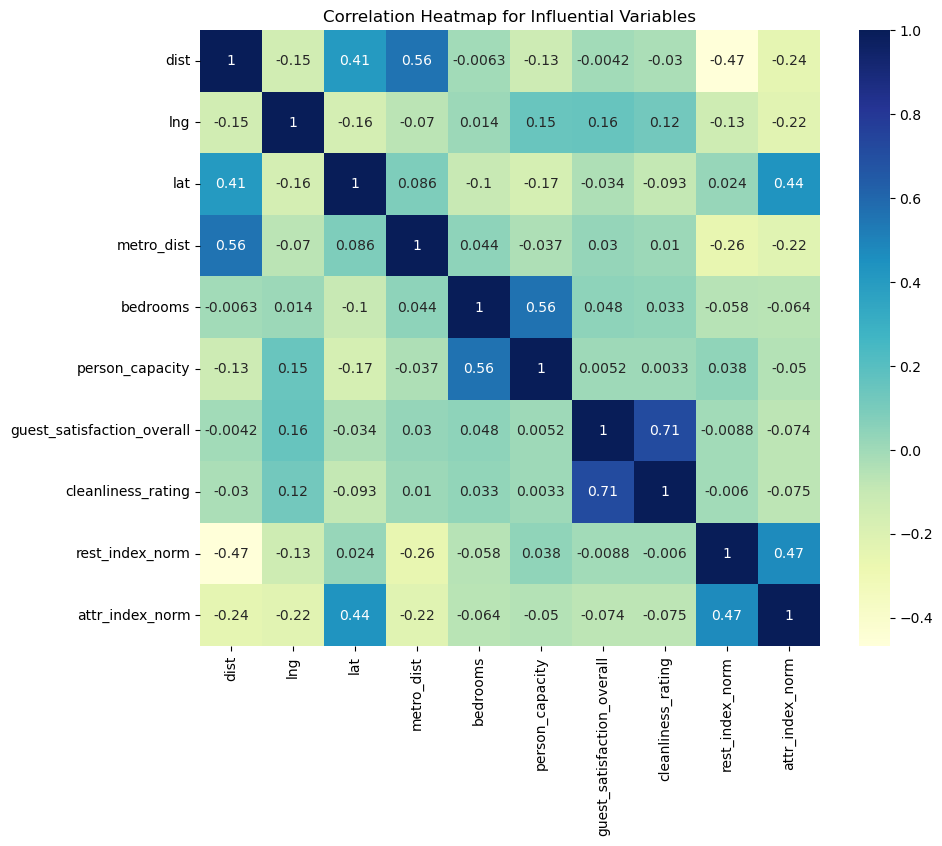

In [8]:
# Create a subset for the most influential variables
influential_variables_df = df[['dist', 'lng', 'lat', 'metro_dist', 'bedrooms',
                               'person_capacity', 'guest_satisfaction_overall',
                               'cleanliness_rating', 'rest_index_norm', 'attr_index_norm']]

# Calculate the correlation matrix
correlation_matrix = influential_variables_df.corr(method='pearson')
print('Correlation Matrix:\n')
display(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap for Influential Variables')
plt.show();

<div style="color: #8B4513; font-weight: bold; font-size: 15px;">

According to the correlation matrix, a relatively strong relationship between the variables cleanliness_rating and guest_satisfaction_overall indicates that the cleanliness of the property has a noticeable impact on guest satisfaction levels. The moderate correlation between person_capacity and bedrooms is also logical, as a larger number of bedrooms typically ensures greater capacity. Additionally, the distance to the metro and the city center shows a moderate correlation. The remaining variables, which have shown an impact on realSum, do not correlate with each other.

We will now build a scatterplot between cleanliness_rating and guest_satisfaction_overall to visualize the form of their relationship.</div>

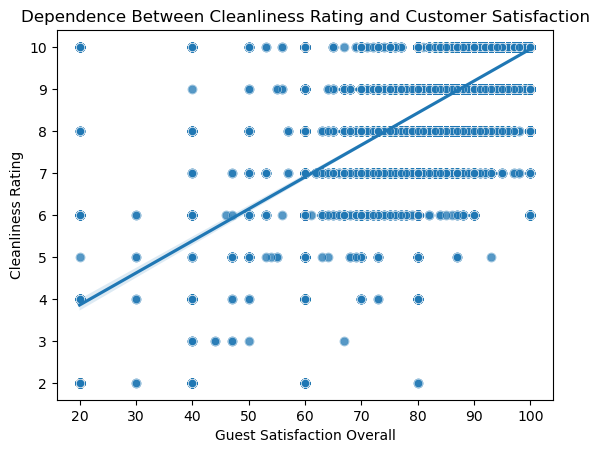

In [10]:
#Scatterplot to determine the relationship between guest satisfaction and cleanliness rating
sns.regplot(x='guest_satisfaction_overall', y='cleanliness_rating', data=df, scatter_kws={'alpha': 0.5})
sns.scatterplot(x=df['guest_satisfaction_overall'], y=df['cleanliness_rating'], alpha=0.5)
plt.title('Dependence Between Cleanliness Rating and Customer Satisfaction')
plt.xlabel('Guest Satisfaction Overall')
plt.ylabel('Cleanliness Rating')
plt.show();

In [11]:
# Test the significance of the correlation using Pearson's test
corr, p_value = pearsonr(df['cleanliness_rating'], df['guest_satisfaction_overall'])

print(f'Correlation: {corr}, p-value: {p_value}')

alpha = 0.05

if p_value < alpha:
    print('Statistically significant result.')
else:
    print('No statistical significance.')

Correlation: 0.7140450220819937, p-value: 0.0
Statistically significant result.


<div style="color: #8B4513; font-weight: bold; font-size: 18px;">
Conclusions: </div>
<div style="color: #8B4513; font-size: 15px;">
There is a strong positive correlation (0.714) between cleanliness_rating and guest_satisfaction_overall, indicating a linear relationship: the higher the cleanliness rating, the greater the overall guest satisfaction.

The p-value = 0.0 confirms that the correlation is statistically significant. The null hypothesis of no correlation is rejected. This finding provides high confidence that a genuine relationship exists between these variables in the analyzed dataset.</div>
<div style="color: #8B4513; font-weight: bold; font-size: 18px;">
Recommendations:</div>
<div style="color: #8B4513; font-size: 15px;">
Landlords should pay close attention to the cleanliness of their properties, as guest satisfaction is directly proportional to cleanliness. This, in turn, impacts the host’s ratings and potential future bookings.

It is recommended to:
1. Ensure the property is cleaned thoroughly before guest check-in.
2. Offer weekly cleaning services to maintain the property in good condition during longer stays.
By prioritizing cleanliness, landlords can enhance guest satisfaction and improve their ratings on platforms like Airbnb.</div>

<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
3. Average Rental Prices Across Cities on Weekdays and Weekends: Are There Significant Differences?

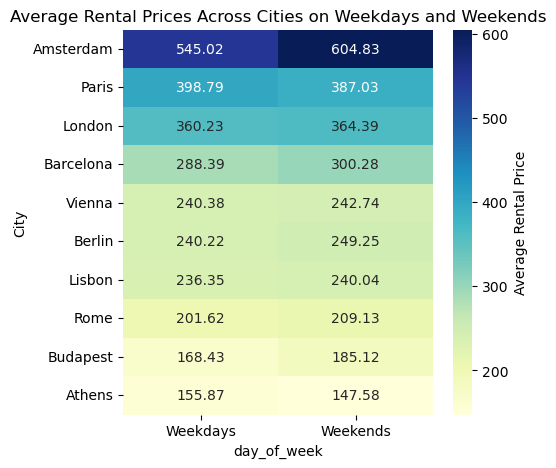

In [14]:
# Create a pivot table showing average rental prices across cities on weekdays and weekends
day_of_week_pivot = pd.pivot_table(
    df,
    index='City',
    columns='day_of_week',
    values='realSum',
    aggfunc='mean',
)

# Sort by the column representing weekdays
day_of_week_pivot = day_of_week_pivot.sort_values(by='Weekdays', ascending=False)

# Display the result with a heatmap with seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(day_of_week_pivot, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Average Rental Price'})
plt.title('Average Rental Prices Across Cities on Weekdays and Weekends')
plt.show();

<div style="color: #8B4513; font-weight: bold; font-size: 15px;">
We will conduct a Two-Way ANOVA test to assess the significance of differences in average rental prices across cities on weekdays and weekends. Specifically, we aim to determine:</div>

<div style="color: #8B4513; font-size: 15px;">
    
- Whether each factor independently affects the outcome.
- Whether there is an interaction between these factors.</div>

<div style="color: #8B4513; font-weight: bold; font-size: 15px;">
Hypotheses for Two-Way ANOVA:</div>

<div style="color: #8B4513; font-size: 15px;">
    
1. Main Effects of Factors:
H₀ (Null Hypothesis): Average prices do not depend on the city.
H₀ (Null Hypothesis): Average prices do not depend on the day of the week.
2. Interaction of Factors:
H₀ (Null Hypothesis): There is no interaction between cities and days of the week (the effect of one factor is independent of the other).

#### Before conducting the ANOVA test, we will check the sample for normality of distribution. </div>

In [16]:
# Create a function that check columns for normality of distribution
def check_normality_for_columns(df, columns):
    """
    Checks the normality of distributions for a list of columns using the Shapiro-Wilk test.
    Visualizes each distribution with a histogram and normal distribution curve.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to check for normality.

    Returns:
    dict: A dictionary with column names as keys and a tuple of test statistics,
          p-values, and normality result (True if normal, False otherwise) as values.
    """
    results = {}

    for column in columns:
        data = df[column]  # Drop missing values for accurate testing
        mean, std = norm.fit(data)  # Fit data to normal distribution

        # Create x-axis for the normal distribution plot
        x_axis = np.linspace(data.min(), data.max(), 100)

        # Plot histogram and normal distribution curve
        plt.figure(figsize=(8, 5))
        plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data histogram')
        plt.plot(x_axis, norm.pdf(x_axis, mean, std), 'r', lw=2, label='Normal PDF')

        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(data)

        # Title and labels
        plt.title(f'Distribution of {column} (p-value={p_value:.4f})')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Determine if the distribution is normal
        is_normal = p_value >= 0.05

        # Store the results
        results[column] = (stat, p_value, is_normal)

        # Print the results
        print(f'Column: {column}')
        print(f'Test Statistic: {stat}')
        print(f'p-value: {p_value}')
        print(f'Is Normal: {'Yes' if is_normal else 'No'}\n')

    return results

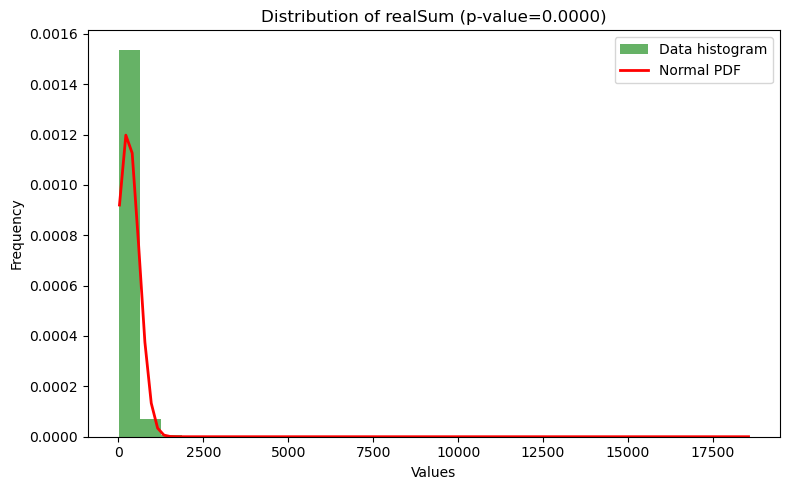

Column: realSum
Test Statistic: 0.37040095953699226
p-value: 6.758722626837969e-150
Is Normal: No



{'realSum': (0.37040095953699226, 6.758722626837969e-150, False)}

In [17]:
# Apply check normality function
colum_to_check = ['realSum']
check_normality_for_columns(df,colum_to_check)

In [18]:
def log_transform(df, cols):
    """
    Apply logarithmic transformation to specified columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    cols (list): List of column names to transform.

    Returns:
    pd.DataFrame: DataFrame with log-transformed columns.
    """
    log_transformed = df.copy()
    
    for col in cols:
        # Create a copy of the column for transformation
        if col in log_transformed.columns:
            if (log_transformed[col] > 0).all():
                log_transformed[col] = np.log(log_transformed[col])
                print(f"Logarithmic transformation applied to column: {col}")
            else:
                print(f"Skipped column {col} due to zero or negative values.")
        else:
            print(f"Column {col} not found in the DataFrame.")

    return log_transformed

Logarithmic transformation applied to column: realSum


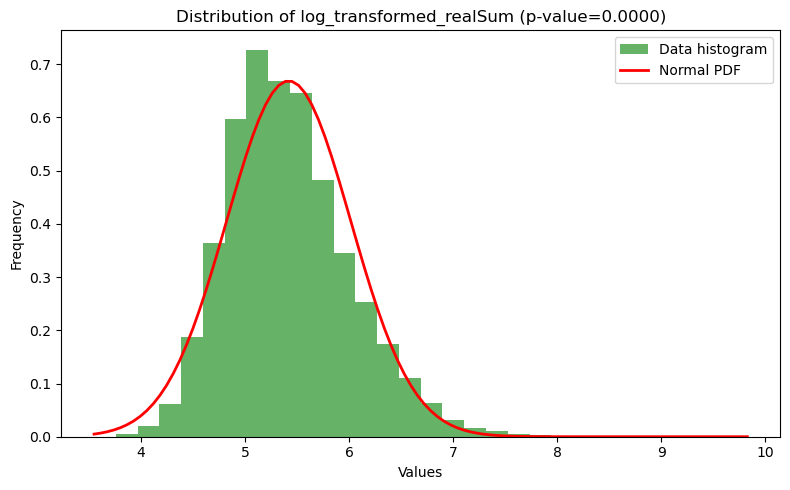

Column: log_transformed_realSum
Test Statistic: 0.9751866702851335
p-value: 1.1171854676413117e-65
Is Normal: No



{'log_transformed_realSum': (0.9751866702851335,
  1.1171854676413117e-65,
  False)}

In [19]:
# Apply log transformation to specific columns
df['log_transformed_realSum'] = log_transform(df, ['realSum'])['realSum']

# Apply check normality function
columns_to_check = ['log_transformed_realSum']
check_normality_for_columns(df, columns_to_check)

In [20]:
# Try to apply Yeo-Johnson trasformation
transformer = PowerTransformer(method='yeo-johnson')
df['transformed_col'] = transformer.fit_transform(df[['realSum']])

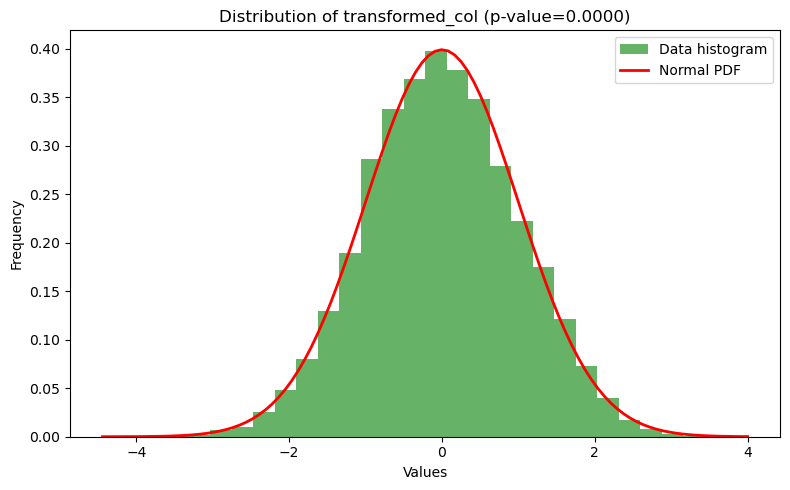

Column: transformed_col
Test Statistic: 0.9996220457625294
p-value: 2.3234059578301577e-08
Is Normal: No



{'transformed_col': (0.9996220457625294, 2.3234059578301577e-08, False)}

In [21]:
# Apply check normality function
colum_to_check = ['transformed_col']
check_normality_for_columns(df,colum_to_check)

<div style="color: #8B4513; font-weight: bold; font-size: 15px;">
Since it was not possible to transform the realSum column to a normal distribution using two different methods, we will proceed with a non-parametric test Permutation ANOVA.</div>

In [23]:
def permutation_anova(data, dv, between, n_permutations=10000):
    """
    Performs a permutation ANOVA to test the significance of differences between groups.
    
    Parameters:
    :param data: DataFrame with data
    :param dv: Column name of dependent variable (e.g. 'realSum')
    :param between: Column name of factor variable (e.g. 'day_type' or 'City')
    :param n_permutations: Number of permutations (default 10000)
    :return: p-value for permutation ANOVA
    """
    
    # Create list of unique groups
    unique_groups = data[between].unique()
    
    # Check if there are at least 2 groups
    if len(unique_groups) < 2:
        raise ValueError("There must be at least two unique groups for comparison.")
    
    # Create a list of data for each group
    group_data = [data[data[between] == group][dv].values for group in unique_groups]
    
    # We calculate the original F-statistic for the data
    f_stat, _ = stats.f_oneway(*group_data)
    
    # List for saving permutation results
    permutation_stats = []
    
    # Permutation process
    for _ in range(n_permutations):
        # Combine all values ​​and mix
        combined_data = np.concatenate(group_data)
        np.random.shuffle(combined_data)
        
        # Distribute the moved values ​​back into groups
        permuted_group_data = [
            combined_data[i: i + len(group)]
            for i, group in zip(
            np.cumsum([0] + [len(g) for g in group_data[:-1]]), 
            group_data
            )
        ]
        
        # Calculating the F-statistic for permuted data
        perm_f_stat, _ = stats.f_oneway(*permuted_group_data)
        permutation_stats.append(perm_f_stat)
    
    # P-value estimation
    p_value = np.sum(np.array(permutation_stats) >= f_stat) / n_permutations
    
    return p_value

In [24]:
# Get the unique cities from the 'City' column
cities = df['City'].unique()

# Loop through each city to perform permutation ANOVA for each one
for city in cities:
    # Filter the data for the current city
    city_data = df[df['City'] == city]
    
    # Call the permutation_anova function to calculate the p-value for the current city
    # The function takes City data, 'realSum' as the dependent variable, and 'day_type' as the factor
    p_value = permutation_anova(city_data, dv='realSum', between='day_of_week', n_permutations=10000)
    
    print(f"City: {city}, p-value: {p_value}")

City: Amsterdam, p-value: 0.0012
City: Barcelona, p-value: 0.3833
City: Rome, p-value: 0.0022
City: Berlin, p-value: 0.3546
City: Budapest, p-value: 0.0
City: Vienna, p-value: 0.9484
City: London, p-value: 0.6621
City: Lisbon, p-value: 0.1961
City: Athens, p-value: 0.2813
City: Paris, p-value: 0.1482


<div style="color: #8B4513; font-weight: bold; font-size: 18px;">
Conclusions: </div>
<div style="color: #8B4513; font-size: 16px;">
Significant differences in rental prices between weekdays and weekends in cities like Amsterdam, Rome, and Budapest are likely driven by special events, festivals, and increased weekend tourism. These events lead to higher demand and higher prices. In contrast, cities like Vienna, London, and Lisbon show no such differences, possibly due to a more consistent flow of visitors or standardized pricing models. Overall, events and festivals are key factors driving weekend price fluctuations in high-tourism cities.</div>

<div style="color: #8B4513; font-weight: bold; font-size: 18px;">
Recommendations based on the analysis:</div>
<div style="color: #8B4513; font-size: 16px;">
	
1. Adjust Prices for Weekends in High-Demand Cities: In cities like Amsterdam, Rome, and Budapest, where significant price differences exist between weekdays and weekends, owners should increase prices during weekends to capitalize on higher demand due to events and festivals.
2. Offer Special Packages for Tourists: Property owners in high-tourism cities should create special packages or discounts for weekend visitors attending events, festivals, or seasonal activities, enhancing guest attraction and occupancy rates.
3. Implement Dynamic Pricing: Use dynamic pricing strategies to automatically adjust rental prices based on demand, raising prices during peak times like weekends and lowering them during weekdays to maintain steady occupancy.
4. Target Weekdays with Promotions: To boost weekday bookings, owners can offer special deals or discounts, ensuring a consistent income stream even when demand is lower compared to weekends. </div>